## Jumpstarting Microsoft's New Film Department



![microsoft_logo](images/MSLogo.png)

## Overview

This project analyzes film data provided by [IMDB](https://www.imdb.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), & [The Numbers](https://www.the-numbers.com/). Through the following analysis, I draw connections between responses to a film (box office performance & viewer favorability) and essential film features, such as its total runtime, primary genre and budget size.

## Business Problem

Microsoft has recently decided to create a new movie studio, but as a company they are completely new to movie making. Thus, they are in need of a data-driven analysis to provide some insight on what kinds of movies will perform well & earn lots if made. 

## Data Preparation

### Importing Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from scipy import stats

In [2]:
csv_files = glob("zippedData/*.csv.gz")

In [3]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv.gz", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [4]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

In [5]:
title_basics_df = csv_files_dict['imdb_title_basics']
title_ratings_df = csv_files_dict['imdb_title_ratings']
movie_budgets_df = csv_files_dict['tn_movie_budgets']

In [6]:
rt_reviews_df = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter = '\t', encoding = 'latin-1')
rt_info_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter = '\t', encoding = 'latin-1')

Now, I examine each of the DataFrames, both to inspect the data types and to search for any abnormalities such as null values. 

In [7]:
movie_budgets_df.shape

(5782, 5)

In [8]:
movie_budgets_df.isna().sum() / len(movie_budgets_df)

release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [9]:
for col in movie_budgets_df:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{movie_budgets_df[col].value_counts(normalize = True)[:5]}")
    print("------------------------------")

Currently checking values from col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
------------------------------
Currently checking values from col: movie
Top 5 values:
Home          0.000519
King Kong     0.000519
Halloween     0.000519
Cat People    0.000346
The Fog       0.000346
Name: movie, dtype: float64
------------------------------
Currently checking values from col: production_budget
Top 5 values:
$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
------------------------------
Currently checking values from col: domestic_gross
Top 5 values:
$0             0.094777
$8,000,000     0.001557
$2,000,000     0.001211
$7,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64
------------------------------
Curr

In [10]:
title_basics_df.shape

(146144, 5)

In [11]:
title_basics_df.isna().sum() / len(title_basics_df)

primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [12]:
for col in title_basics_df:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{title_basics_df[col].value_counts(normalize = True)[1:5]}")
    print("------------------------------")

Currently checking values from col: primary_title
Top 5 values:
The Return    0.000137
Broken        0.000137
Homecoming    0.000109
Alone         0.000109
Name: primary_title, dtype: float64
------------------------------
Currently checking values from col: original_title
Top 5 values:
Home          0.000123
The Return    0.000116
Alone         0.000089
The Gift      0.000089
Name: original_title, dtype: float64
------------------------------
Currently checking values from col: start_year
Top 5 values:
2016    0.118185
2018    0.115290
2015    0.111144
2014    0.106669
Name: start_year, dtype: float64
------------------------------
Currently checking values from col: runtime_minutes
Top 5 values:
Series([], Name: runtime_minutes, dtype: float64)
------------------------------
Currently checking values from col: genres
Top 5 values:
Drama           0.152669
Comedy          0.065207
Horror          0.031065
Comedy,Drama    0.025004
Name: genres, dtype: float64
--------------------------

In [13]:
title_ratings_df.shape

(73856, 2)

In [14]:
title_ratings_df.isna().sum() / len(title_ratings_df)

averagerating    0.0
numvotes         0.0
dtype: float64

In [15]:
for col in title_ratings_df:
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{title_ratings_df[col].value_counts(normalize = True)[1:5]}")
    print("------------------------------")

Currently checking values from col: averagerating
Top 5 values:
Series([], Name: averagerating, dtype: float64)
------------------------------
Currently checking values from col: numvotes
Top 5 values:
5    0.036544
7    0.033525
8    0.029341
9    0.026118
Name: numvotes, dtype: float64
------------------------------


In [16]:
rt_info_df.shape

(1560, 12)

In [17]:
rt_info_df.isna().sum() / len(rt_info_df)

id              0.000000
synopsis        0.039744
rating          0.001923
genre           0.005128
director        0.127564
writer          0.287821
theater_date    0.230128
dvd_date        0.230128
currency        0.782051
box_office      0.782051
runtime         0.019231
studio          0.683333
dtype: float64

In [18]:
for col in rt_info_df.drop(columns='synopsis'):
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{rt_info_df[col].value_counts(normalize = True)[:5]}")
    print("------------------------------")

Currently checking values from col: id
Top 5 values:
2000    0.000641
697     0.000641
673     0.000641
674     0.000641
675     0.000641
Name: id, dtype: float64
------------------------------
Currently checking values from col: rating
Top 5 values:
R        0.334618
NR       0.323057
PG       0.154143
PG-13    0.150931
G        0.036609
Name: rating, dtype: float64
------------------------------
Currently checking values from col: genre
Top 5 values:
Drama                                0.097294
Comedy                               0.070876
Comedy|Drama                         0.051546
Drama|Mystery and Suspense           0.043170
Art House and International|Drama    0.039948
Name: genre, dtype: float64
------------------------------
Currently checking values from col: director
Top 5 values:
Steven Spielberg    0.007348
Clint Eastwood      0.005878
William Beaudine    0.002939
Yimou Zhang         0.002939
Bruce Beresford     0.002939
Name: director, dtype: float64
-------------------

In [19]:
rt_reviews_df.shape

(54432, 8)

In [20]:
rt_reviews_df.isna().sum() / len(rt_reviews_df)

id            0.000000
review        0.102201
rating        0.248328
fresh         0.000000
critic        0.050007
top_critic    0.000000
publisher     0.005677
date          0.000000
dtype: float64

In [21]:
for col in rt_reviews_df.drop(columns='review'):
    print(f"Currently checking values from col: {col}")
    print(f"Top 5 values:\n{rt_reviews_df[col].value_counts(normalize = True)[:5]}")
    print("------------------------------")

Currently checking values from col: id
Top 5 values:
782     0.006210
1067    0.005052
1525    0.004813
1777    0.004777
1083    0.004777
Name: id, dtype: float64
------------------------------
Currently checking values from col: rating
Top 5 values:
3/5    0.105756
4/5    0.089747
3/4    0.087425
2/5    0.077233
2/4    0.066284
Name: rating, dtype: float64
------------------------------
Currently checking values from col: fresh
Top 5 values:
fresh     0.606904
rotten    0.393096
Name: fresh, dtype: float64
------------------------------
Currently checking values from col: critic
Top 5 values:
Emanuel Levy       0.011506
Roger Ebert        0.008915
Dennis Schwartz    0.007987
Nell Minow         0.007194
Frank Swietek      0.006730
Name: critic, dtype: float64
------------------------------
Currently checking values from col: top_critic
Top 5 values:
0    0.759406
1    0.240594
Name: top_critic, dtype: float64
------------------------------
Currently checking values from col: publisher


### Basic Data Cleaning 

Both the **title_basics_df** & **rt_reviews_df** DataFrames have columns (*runtime_minutes* & *reviews*, respectively) containing large chunks of missing values -- about 20% of entries for both.

Additionally, each DataFrame has tens or hundreds of thousands of elements, so both are sufficiently large even after I drop all null values.

In [22]:
title_basics_df.dropna(inplace=True)

In [23]:
title_basics_df.shape

(112232, 5)

In [24]:
title_basics_df.isna().sum() / len(title_basics_df)

primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64

In [25]:
rt_reviews_df.dropna(inplace=True)

In [26]:
rt_reviews_df.shape

(33988, 8)

In [27]:
rt_reviews_df.isna().sum() / len(rt_reviews_df)

id            0.0
review        0.0
rating        0.0
fresh         0.0
critic        0.0
top_critic    0.0
publisher     0.0
date          0.0
dtype: float64

The columns for *budget* and both *gross* values are not stored as numerical data in the **movie_budgets_df** DataFrame, which will cause issues for analysis.

In [28]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I remove the dollar signs and commas from each column before converting their data types to 'integer'.

In [29]:
def convert_money_int(df, col):
    df[col] = df[col].str.replace("$","").str.replace(",","").astype(int)
    return df

In [30]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    movie_budgets_df = convert_money_int(movie_budgets_df, col)

In [31]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## Analysis

### Movie Genre

Using IMDB's data, I explore the link between a movie's primary genre and its worldwide financial performance. This begins with creating new columns for global net gross, release year & return on investment as a percentage.

In [32]:
movie_budgets_df['net_world'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']

In [33]:
movie_budgets_df['year'] = pd.to_datetime(movie_budgets_df['release_date']).dt.year

In [34]:
movie_budgets_df['roi_%'] = (movie_budgets_df['net_world'] / movie_budgets_df['production_budget']) * 100

In [35]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_world,year,roi_%
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,553.257713
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,154.667286
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,-57.210757
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,315.369636


I merge DataFrames from IMDB & The Numbers into the new **gross_by_genre_df** and remove duplicate entries.

In [36]:
gross_by_genre_df = pd.merge(movie_budgets_df, title_basics_df, left_on = ['movie', 'year'],
                        right_on = ['primary_title', 'start_year'],
                        how = 'inner')
gross_by_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1519 non-null   object 
 1   movie              1519 non-null   object 
 2   production_budget  1519 non-null   int64  
 3   domestic_gross     1519 non-null   int64  
 4   worldwide_gross    1519 non-null   int64  
 5   net_world          1519 non-null   int64  
 6   year               1519 non-null   int64  
 7   roi_%              1519 non-null   float64
 8   primary_title      1519 non-null   object 
 9   original_title     1519 non-null   object 
 10  start_year         1519 non-null   int64  
 11  runtime_minutes    1519 non-null   float64
 12  genres             1519 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 166.1+ KB


In [37]:
gross_by_genre_df.isna().sum() / len(gross_by_genre_df)

release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
net_world            0.0
year                 0.0
roi_%                0.0
primary_title        0.0
original_title       0.0
start_year           0.0
runtime_minutes      0.0
genres               0.0
dtype: float64

In [38]:
gross_by_genre_df.drop_duplicates(subset=['release_date', 'movie'], inplace=True)
gross_by_genre_df.shape

(1470, 13)

This process appears to have spotted 49 duplicate entries and dropped all of them. Now, I examine the *genres* column to see if it's currently usable for creating a plot.

In [39]:
gross_by_genre_df.genres

0       Action,Adventure,Fantasy
1        Action,Adventure,Sci-Fi
2        Action,Adventure,Sci-Fi
3        Action,Adventure,Sci-Fi
4       Action,Adventure,Fantasy
                  ...           
1514                       Drama
1515     Horror,Mystery,Thriller
1516        Crime,Drama,Thriller
1517       Drama,Horror,Thriller
1518                       Drama
Name: genres, Length: 1470, dtype: object

I create a new *genres_split* column, where each element contains a film's given genres separated within a list.

In [40]:
gross_by_genre_df['genres_split'] = gross_by_genre_df['genres'].map(lambda x: x.split(",") if x else x)
gross_by_genre_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_world,year,roi_%,primary_title,original_title,start_year,runtime_minutes,genres,genres_split
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,154.667286,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
1,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,-57.210757,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,582.711400,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,2017,118.648403,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"


It is now easy to create specific columns for a film's primary & secondary genres. I am working under the assumption that IMDB has listed the genres for each film in order of relevance.

After that is done, I drop unnecessary columns and check for any ROI outliers that might distort my attempts at visualizations.

In [41]:
gross_by_genre_df['genre1'] = gross_by_genre_df['genres_split'].map(lambda x: x[0])

In [42]:
y = 'NA'
gross_by_genre_df['genre2'] = gross_by_genre_df['genres_split'].map(lambda x: y if len(x) < 2 else x[1])

In [43]:
to_drop = ['primary_title', 'original_title', 'start_year', 
           'genres', 'genres_split', 'release_date']
gross_by_genre_df.drop(columns = to_drop, inplace=True)

In [44]:
gross_by_genre_df.sort_values(by='roi_%', ascending=False).head()

,movie,production_budget,domestic_gross,worldwide_gross,net_world,year,roi_%,runtime_minutes,genre1,genre2
1494,The Gallows,100000,22764410,41656474,41556474,2015,41556.474000,81.0,Horror,Mystery
1400,The Devil Inside,1000000,53262945,101759490,100759490,2012,10075.949000,83.0,Horror,NA
1281,Paranormal Activity 2,3000000,84752907,177512032,174512032,2010,5817.067733,91.0,Horror,NA
1189,Get Out,5000000,176040665,255367951,250367951,2017,5007.359020,104.0,Horror,Mystery
1375,Moonlight,1500000,27854931,65245512,63745512,2016,4249.700800,111.0,Drama,NA


In [45]:
df1 = gross_by_genre_df[(np.abs(stats.zscore(gross_by_genre_df['roi_%'])) < 3)]

Now I am ready to visualize the data.

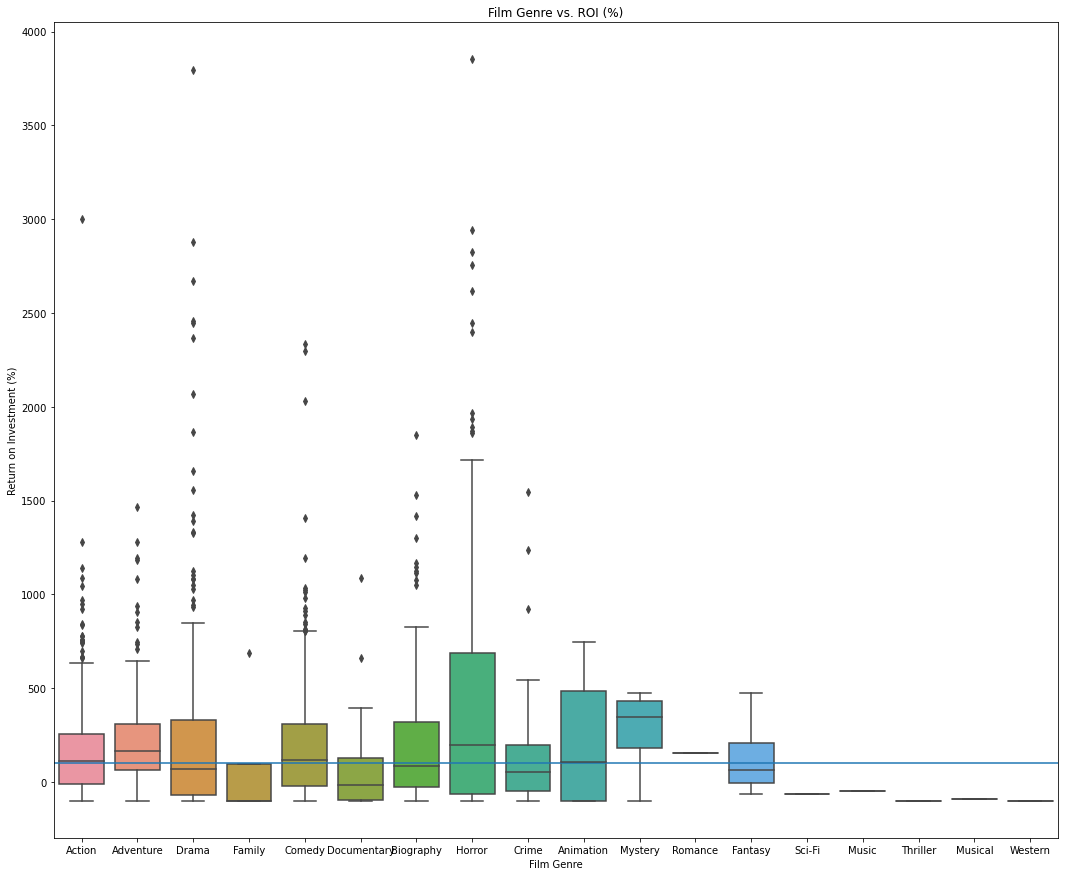

In [46]:
fig, ax = plt.subplots(figsize=(18,15))

sns.boxplot(x='genre1', y='roi_%', data=df1, ax=ax)
ax.axhline(y=100)
ax.set_title('Film Genre vs. ROI (%)')
ax.set_xlabel('Film Genre')
ax.set_ylabel('Return on Investment (%)')

plt.savefig("roigenrebox.png")
plt.show()

In the boxplot above, I added a horizontal line at the y-value of 100% ROI. This marker indicates the point where a film has earned double its production budget. 

The primary genres of Action, Adventure, Comedy, Horror, Animation & Mystery all have median ROI levels above the 100% threshold. The best looking genres with numerous entries, however, seem to be Action, Adventure, Comedy & Horror, so I will explore the ROI trends for each of these genres further. 

In [47]:
df1 = df1[(df1.genre1 == 'Adventure') | (df1.genre1 == 'Comedy') | 
          (df1.genre1 == 'Horror') | (df1.genre1 == 'Action')]

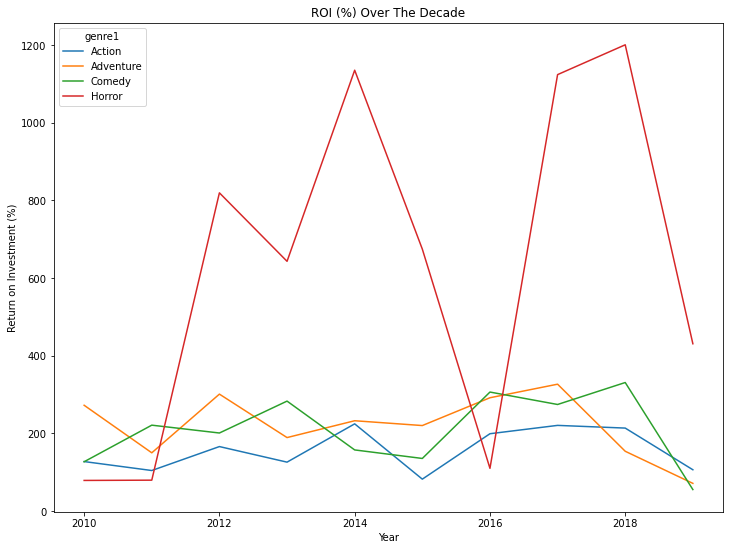

In [48]:
fig, ax = plt.subplots(figsize=(12,9))

sns.lineplot(x='year', y='roi_%', data=df1, hue='genre1', ci=None, ax=ax)
ax.set_title('ROI (%) Over The Decade')
ax.set_xlabel('Year')
ax.set_ylabel('Return on Investment (%)')

plt.savefig("timeroi.png")
plt.show()

It seems as though the advent of streaming has been negatively impacting overall film profitability over the last couple of years, as every genres' ROI percentage has trended downwards since 2018. 

Looking at the trends pre-2018, however, reveals that Action, Comedy & Horror movies have made noticeable gains from the beginning of the decade. Action seems to have the most stable, subtle growth, and Comedy has had some noticeable oscillations in profitability. Horror, however, has by far the most erratic jumps up and down in its return on investment. 

Adventure has ROI shifts similar to those of Comedy, but overall seems to be trending downwards over the decade, even before 2018. 

Based on these figures, I would recommend that Microsoft begin their venture by focusing on primary genres of Action, Comedy & Horror. They should keep in mind, too, that Action might be the most dependable of the three profit-wise.  

### Production Budget

The production budgets of films listed by The Numbers have a mean of ~32 million dollars and a median of 17 million dollars. This discrepency makes it evident that there is significant skew in the budgets.

In [49]:
movie_budgets_df['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

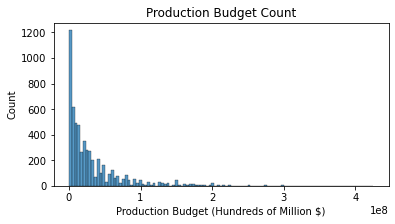

In [50]:
plt.figure(figsize=(6,3))
sns.histplot(data=movie_budgets_df['production_budget'])

plt.title('Production Budget Count')
plt.xlabel('Production Budget (Hundreds of Million $)')

plt.savefig("budgetcount.png")

It is now especially clear that the collection of budgets is both skewed and enormously wide-ranging. In other words, a single plot that captures every value won't be particularly insightful. Instead, I divide the budgets into different ranges before observing the financial performance of each group.

The most sensible way to categorize production budgets is by using the quantiles shown above. This provides 4 distinct budget tiers -- High Budget, Medium-Low Budget, Medium-High Budget and High Budget. 

In [51]:
bins = [0, 5000000, 17000000, 40000000, np.inf]
names = ['Low', 'MedLo', 'MedHi', 'High']

In [52]:
movie_budgets_df['budget_tier'] = pd.cut(movie_budgets_df['production_budget'], bins, labels=names)

In [53]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_world,year,roi_%,budget_tier
id,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,553.257713,High
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,154.667286,High
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,-57.210757,High
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,324.384139,High
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,315.369636,High


I inspect the ROI values from **movie_budgets_df** to see, like in the last analysis, if any outliers exist and need to be dropped.

In [54]:
print(movie_budgets_df.sort_values(by='roi_%', ascending=False).head())

    release_date                    movie  production_budget  domestic_gross  \
id                                                                             
46  Jun 30, 1972              Deep Throat              25000        45000000   
14  Mar 21, 1980                  Mad Max             200000         8750000   
93  Sep 25, 2009      Paranormal Activity             450000       107918810   
80  Jul 10, 2015              The Gallows             100000        22764410   
7   Jul 14, 1999  The Blair Witch Project             600000       140539099   

    worldwide_gross  net_world  year          roi_% budget_tier  
id                                                               
46         45000000   44975000  1972  179900.000000         Low  
14         99750000   99550000  1980   49775.000000         Low  
93        194183034  193733034  2009   43051.785333         Low  
80         41656474   41556474  2015   41556.474000         Low  
7         248300000  247700000  1999   4128

In [55]:
print('Mean:', movie_budgets_df['roi_%'].mean())
print('Standard Dev:', movie_budgets_df['roi_%'].std())
print('Upper Outliers Above:', movie_budgets_df['roi_%'].mean() + 3*(movie_budgets_df['roi_%'].std()))

Mean: 380.01613657949645
Standard Dev: 2953.0282308933056
Upper Outliers Above: 9239.100829259412


In [56]:
movie_budgets_df = movie_budgets_df[movie_budgets_df['roi_%'] <= 9239.1]
print(movie_budgets_df.sort_values(by='roi_%', ascending=False).head())

    release_date           movie  production_budget  domestic_gross  \
id                                                                    
76  Feb 15, 1950      Cinderella            2900000        85000000   
7   Nov 19, 1925  The Big Parade             245000        11000000   
60  Apr 23, 2009            Home             500000           15433   
57  Oct 29, 2004             Saw            1200000        55968727   
26  Apr 15, 1983   The Evil Dead             375000         2400000   

    worldwide_gross  net_world  year        roi_% budget_tier  
id                                                             
76        263591415  260691415  1950  8989.359138         Low  
7          22000000   21755000  1925  8879.591837         Low  
60         44793168   44293168  2009  8858.633600         Low  
57        103880027  102680027  2004  8556.668917         Low  
26         29400000   29025000  1983  7740.000000         Low  


The median ROI from each group indicates that the high-budget films (at least 40 million dollars) have the highest relative payoff.

In [57]:
movie_budgets_df.groupby('budget_tier')['roi_%'].median()

budget_tier
Low      -12.972350
MedLo     65.099995
MedHi     66.240468
High     117.279631
Name: roi_%, dtype: float64

In [58]:
low_df = movie_budgets_df[movie_budgets_df['budget_tier']=='Low']
medlo_df = movie_budgets_df[movie_budgets_df['budget_tier']=='MedLo']
medhi_df = movie_budgets_df[movie_budgets_df['budget_tier']=='MedHi']
high_df = movie_budgets_df[movie_budgets_df['budget_tier']=='High']

In [59]:
tier_list = [low_df, medlo_df, medhi_df, high_df]
low_df.name = "Low Production Budget"
medlo_df.name = "Mid-Low Production Budget"
medhi_df.name = "Mid-Hi Production Budget"
high_df.name = "High Production Budget"

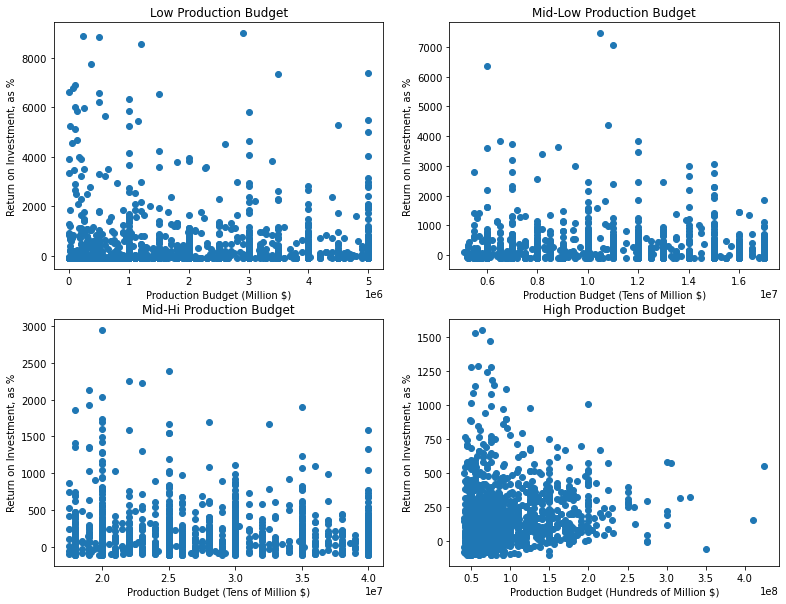

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10))

for (i, j) in zip(ax.flatten(), tier_list):
    i.scatter(x= j["production_budget"], 
                y= j["roi_%"])
    i.set_title(j.name)
    i.set_ylabel('Return on Investment, as %')
    if j['production_budget'].mean() <= 10000000:
        i.set_xlabel('Production Budget (Million $)')
    elif j['production_budget'].mean() <= 50000000:
        i.set_xlabel('Production Budget (Tens of Million $)')
    else: 
        i.set_xlabel('Production Budget (Hundreds of Million $)')

plt.savefig("budgetvsroi.png")
plt.show()

(Note that the above plots have different scales for measuring production budget & ROI. Check the axis labels for more detail.) 

These plots indicate that there is only a positive correlation between budget & ROI for high budget films. I look at the relationship between budget and global net gross, a more concrete figure, to confirm my conclusion. 

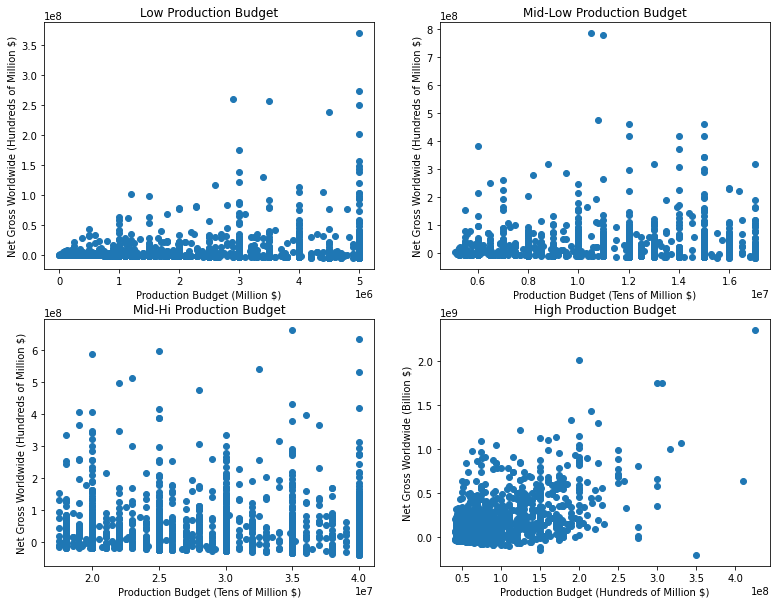

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10))

for (i, j) in zip(ax.flatten(), tier_list):
    i.scatter(x= j["production_budget"], 
                y= j["net_world"])
    i.set_title(j.name)
    if j['production_budget'].mean() <= 10000000:
        i.set_xlabel('Production Budget (Million $)')
        i.set_ylabel('Net Gross Worldwide (Hundreds of Million $)')
    elif j['production_budget'].mean() <= 50000000:
        i.set_xlabel('Production Budget (Tens of Million $)')
        i.set_ylabel('Net Gross Worldwide (Hundreds of Million $)')
    else: 
        i.set_xlabel('Production Budget (Hundreds of Million $)')
        i.set_ylabel('Net Gross Worldwide (Billion $)')

plt.savefig("budgetvsnet.png")
plt.show()

These plots further cement my previous interpretation: films with high budgets (40 million USD or more) have by far the most predictable correlation between budget and net financial gain. 

### Movie Runtime

I see if a film's runtime affects how positively the audience & critics respond to the film. 

#### First, I inspect ratings_basics_df, which is both IMDB DataFrames merged into one that can display runtime and audience ratings. 

In [62]:
ratings_basics_df = pd.merge(title_basics_df, title_ratings_df, on='tconst')
ratings_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [63]:
ratings_basics_df.drop(columns=['original_title', 'genres'], inplace=True)
ratings_basics_df.drop_duplicates(subset=['primary_title', 'start_year'], inplace=True)

I want to see whether the relationship between runtime and aggregate audience rating is affected at all by the number of votes in a rating. So, as with the previous question, I split the number of votes into four distinct categories by quantile value. 

In [64]:
ratings_basics_df['numvotes'].describe()

count    6.523600e+04
mean     3.968060e+03
std      3.216720e+04
min      5.000000e+00
25%      1.600000e+01
50%      6.200000e+01
75%      3.530000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [65]:
bins2 = [0, 16, 62, 353, np.inf]
names2 = ['LoVotes', 'MedLoVotes', 'MedHiVotes', 'HighVotes']

ratings_basics_df['numvotes_tier'] = pd.cut(ratings_basics_df['numvotes'], bins2, labels=names2)

In [66]:
print('DataFrame Dimensions:', ratings_basics_df.shape)
print(ratings_basics_df.head())

DataFrame Dimensions: (65236, 6)
                             primary_title  start_year  runtime_minutes  \
tconst                                                                    
tt0063540                        Sunghursh        2013            175.0   
tt0066787  One Day Before the Rainy Season        2019            114.0   
tt0069049       The Other Side of the Wind        2018            122.0   
tt0100275         The Wandering Soap Opera        2017             80.0   
tt0137204                  Joe Finds Grace        2017             83.0   

           averagerating  numvotes numvotes_tier  
tconst                                            
tt0063540            7.0        77    MedHiVotes  
tt0066787            7.2        43    MedLoVotes  
tt0069049            6.9      4517     HighVotes  
tt0100275            6.5       119    MedHiVotes  
tt0137204            8.1       263    MedHiVotes  


I now try making a visual plotting the runtime vs. audience rating, colored by how many votes were cast for the film's rating.

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

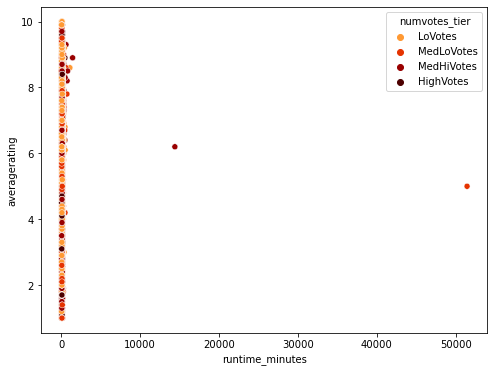

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = ratings_basics_df,
                x='runtime_minutes',
                y='averagerating',
                hue='numvotes_tier',
                palette='gist_heat_r'
                )

The plot makes it obvious that there are harmful outliers in the film runtime. I elminiate these through filtering **ratings_basics_df**.

In [68]:
ratings_basics_df['runtime_minutes'].describe()

count    65236.000000
mean        94.738595
std        210.141817
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [69]:
runtime = ratings_basics_df['runtime_minutes']
runtime_cleaned_df = ratings_basics_df[runtime < (runtime.mean() + 3*runtime.std())]
print(runtime_cleaned_df.sort_values(by='runtime_minutes', ascending=False).head())

                                             primary_title  start_year  \
tconst                                                                   
tt2261469                            Double Fine Adventure        2015   
tt5374716                                Chamisso's Shadow        2016   
tt5375100                                     Paint Drying        2016   
tt8690764  Silence not silence, red not red, live not live        2018   
tt3984388                                         Close Up        2012   

           runtime_minutes  averagerating  numvotes numvotes_tier  
tconst                                                             
tt2261469            724.0            8.5        59    MedLoVotes  
tt5374716            720.0            7.8        19    MedLoVotes  
tt5375100            607.0            9.3       218    MedHiVotes  
tt8690764            601.0            8.6        22    MedLoVotes  
tt3984388            500.0            6.1        13       LoVotes  


This helps make the data more plottable. But a look at the new descriptive statistics lets me know that there is still at least one more outlier in need of elimination (see *mean*, *std* & *max* below).

In [70]:
runtime_cleaned_df['runtime_minutes'].describe()

count    65230.000000
mean        93.675502
std         24.136521
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max        724.000000
Name: runtime_minutes, dtype: float64

In [71]:
runtime2 = runtime_cleaned_df['runtime_minutes']
runtime_cleaned_df = runtime_cleaned_df[runtime2 < (runtime2.mean() + 3*runtime2.std())]
print(runtime_cleaned_df.sort_values(by='runtime_minutes', ascending=False).head())

                               primary_title  start_year  runtime_minutes  \
tconst                                                                      
tt7757972                          Saakshyam        2018            166.0   
tt2309600                           Singam 2        2013            166.0   
tt2579680                          100% Love        2012            166.0   
tt2956300  ABCD: American-Born Confused Desi        2013            166.0   
tt2320312        Idiot: I Do Ishq Only Tumse        2012            166.0   

           averagerating  numvotes numvotes_tier  
tconst                                            
tt7757972            5.3       262    MedHiVotes  
tt2309600            6.3      5046     HighVotes  
tt2579680            6.0       296    MedHiVotes  
tt2956300            6.7      2141     HighVotes  
tt2320312            6.0        10       LoVotes  


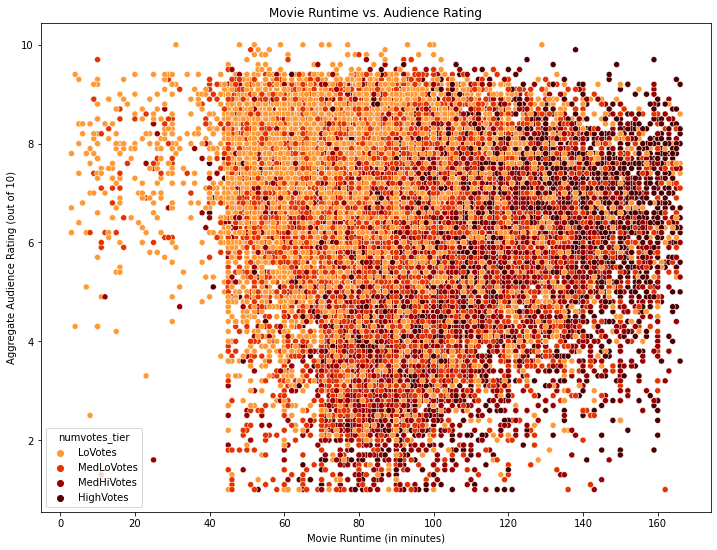

In [72]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = runtime_cleaned_df,
                x='runtime_minutes',
                y='averagerating',
                hue='numvotes_tier',
                palette='gist_heat_r'
                )
plt.title('Movie Runtime vs. Audience Rating')
plt.xlabel('Movie Runtime (in minutes)')
plt.ylabel('Aggregate Audience Rating (out of 10)')

plt.savefig("runtimeratingtier.png")

The scatter plot is significantly improved, but it is now clear that using all categories of *numvotes_tier* introduces too much noise. I switch to a regplot only using ratings with a "high" number of votes. Of the four categories, it is clearly the closest to representing the actual audience response.

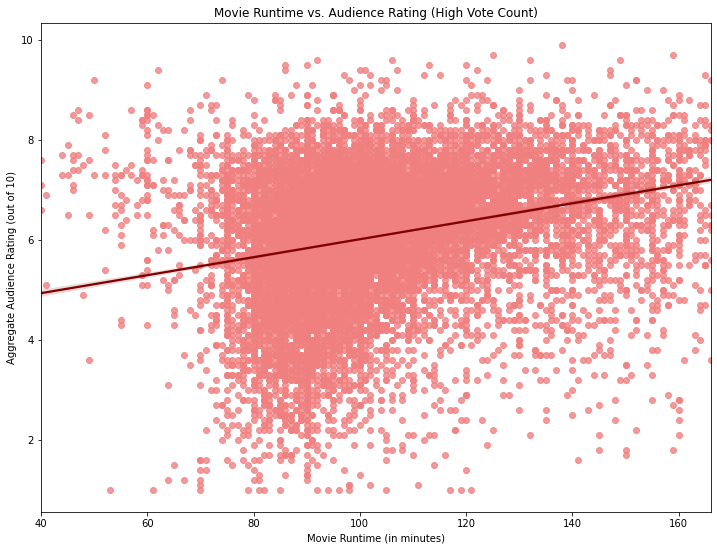

In [73]:
fig, ax = plt.subplots(figsize=(12,9))

ax.set_title('Movie Runtime vs. Audience Rating (High Vote Count)')
sns.regplot(x='runtime_minutes', y='averagerating', 
            data=runtime_cleaned_df[runtime_cleaned_df['numvotes_tier'] == 'HighVotes'],
            ax=ax,
            color='lightcoral',
            line_kws={'color':'maroon'},
            fit_reg=True)
ax.set_xlabel('Movie Runtime (in minutes)')
ax.set_ylabel('Aggregate Audience Rating (out of 10)')

plt.savefig("runtimerating.png")

This plot suggests a positive relationship between runtime & audience response, especially from the 90 minute runtime onwards. The films with the highest rating floor that still have tight clustering appear around 110-120 minutes. 

#### Next, I inspect review scores from Rotten Tomatoes. 

I combine the two Rotten Tomatoes DataFrames into one that give both a film's runtime and its review score. But first, I notice that **rt_reviews_df**'s *rating* column has scores of differing metrics. 

In [74]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [75]:
rt_reviews_df['rating'].unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '0/4', '2/10', '7', '3',
       'A+', 'A', '4.5/5', '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10',
       '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0.5/10', '5', '0',
       '2', '1/10', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5', '0.5/5',
       '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5', '8.6/10',
       '6/8', 'D-', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '3.5/10', '5.8/10', '4.0/5', '0/10', '5.0/10', '5.9/10', '2.4/5',
       '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4', '8.8/10', '4.0/10',
       '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '3.2', '4.2', '8.4',
       '5.5/5', '6.3/10', '7.6/10', '8.1/10', '3.6/5', '2/6', '7.7/10'

The single number scores and letter grades like 'T' are too vague to be useful and must be dropped. After drops are made, I convert the letter-grade & fraction scores into one standard percent score that doesn't exceed a grade of 100.

In [76]:
for (index, rating) in rt_reviews_df['rating'].items():
    if '/' not in rating:
        if (rating.isupper() == False):
            rt_reviews_df.drop(index, inplace=True)
        elif rating == 'T':
            rt_reviews_df.drop(index, inplace=True)
        else: 
            continue
    elif ' ' in rating:
            rt_reviews_df.drop(index, inplace=True)
    else: 
        continue

In [77]:
letter_grade_dict = {'A+': 98,'A': 95,'A-': 92,'B+': 88,'B': 85,'B-': 82,
                    'C+': 78,'C': 75,'C-': 72,'D+': 68,'D': 65,'D-': 62,
                    'F+': 58,'F': 55,'F-': 52}

In [78]:
def score_convert(score):
    if '/' in score:
        fract = score.split('/')
        score = float(fract[0]) * (100.0/float(fract[1]))
    elif score.isupper() == True:
        score = letter_grade_dict[score]
    return score    

In [79]:
rt_reviews_df['rating'] = rt_reviews_df['rating'].map(lambda x: score_convert(x))
rt_reviews_df = rt_reviews_df[rt_reviews_df['rating'] <=100]

In [80]:
rt_reviews_df['rating'].unique()

array([ 60.        ,  75.        ,  40.        ,  82.        ,
        50.        ,  85.        ,  80.        , 100.        ,
        25.        ,  62.5       ,  30.        ,  70.        ,
        92.        ,  55.        ,  87.5       ,  68.        ,
        37.5       ,  88.        ,  90.        ,  72.        ,
        20.        ,  78.        ,   0.        ,  12.5       ,
        65.        ,  62.        ,  98.        ,  95.        ,
        74.        ,  84.        ,  44.        ,   5.        ,
        10.        ,  15.        ,  23.        ,  45.        ,
        66.66666667,  86.        ,  42.        ,  71.        ,
        35.        ,  58.        ,  59.        ,  48.        ,
        38.        ,  57.5       ,  63.        ,  76.        ,
        81.        ,  33.33333333,  77.        ,  89.        ,
        83.        ,  43.33333333,  41.        ,  79.        ,
        87.        ,  43.        ,  96.        ,  16.66666667,
        52.        ,  66.        ,  32.        ,  83.33

The two DataFrames **rt_reviews_df** & **rt_info_df** are almost ready to be joined. Before that is done, though, I change the name of the (audience) *rating* column in **rt_reviews_df** to avoid confusion with the (MPA content) *rating* column from **rt_info_df**.

In [81]:
rt_reviews_df = rt_reviews_df.rename(columns={'rating': 'score'})

In [82]:
info_reviews_df = pd.merge(rt_reviews_df, rt_info_df, on = ['id'], how = 'left')

In [83]:
info_reviews_df.head()

,id,review,score,fresh,critic,top_critic,publisher,date,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,60.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,"Quickly grows repetitive and tiresome, meander...",75.0,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,Cronenberg is not a director to be daunted by ...,40.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,"While not one of Cronenberg's stronger films, ...",82.0,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,Robert Pattinson works mighty hard to make Cos...,50.0,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [84]:
cols_to_drop = ['review','fresh','top_critic','date','synopsis','rating',
                'genre','theater_date','dvd_date','studio']
info_reviews_df.drop(columns=cols_to_drop, inplace=True)
info_reviews_df.head()

,id,score,critic,publisher,director,writer,currency,box_office,runtime
0,3,60.0,PJ Nabarro,Patrick Nabarro,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",108 minutes
1,3,75.0,Eric D. Snider,EricDSnider.com,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",108 minutes
2,3,40.0,Matt Kelemen,Las Vegas CityLife,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",108 minutes
3,3,82.0,Emanuel Levy,EmanuelLevy.Com,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",108 minutes
4,3,50.0,Christian Toto,Big Hollywood,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",108 minutes


In [85]:
print(info_reviews_df.shape)
print(info_reviews_df.isna().sum() / len(info_reviews_df))

(33334, 9)
id            0.000000
score         0.000000
critic        0.000000
publisher     0.000000
director      0.104698
writer        0.170817
currency      0.303444
box_office    0.303444
runtime       0.017100
dtype: float64


In [86]:
info_reviews_df.runtime.unique()

array(['108 minutes', '116 minutes', '128 minutes', '95 minutes',
       '82 minutes', '123 minutes', '117 minutes', nan, '90 minutes',
       '97 minutes', '106 minutes', '129 minutes', '98 minutes',
       '127 minutes', '96 minutes', '114 minutes', '110 minutes',
       '75 minutes', '92 minutes', '91 minutes', '100 minutes',
       '99 minutes', '103 minutes', '142 minutes', '119 minutes',
       '122 minutes', '86 minutes', '93 minutes', '111 minutes',
       '89 minutes', '115 minutes', '107 minutes', '165 minutes',
       '113 minutes', '118 minutes', '102 minutes', '101 minutes',
       '135 minutes', '109 minutes', '70 minutes', '124 minutes',
       '105 minutes', '134 minutes', '87 minutes', '188 minutes',
       '104 minutes', '126 minutes', '63 minutes', '132 minutes',
       '137 minutes', '79 minutes', '65 minutes', '147 minutes',
       '171 minutes', '59 minutes', '80 minutes', '94 minutes',
       '88 minutes', '81 minutes', '85 minutes', '130 minutes',
       '143 mi

I cannot work mathematically or visually with these runtimes as strings, so I remove the "minutes" portion of the string and convert the column to type int. Additionally, I spot a null "nan" label, so any null values from the column must be dropped. 

In [87]:
info_reviews_df.dropna(subset=['runtime'], inplace=True)
info_reviews_df.runtime = info_reviews_df.runtime.str.replace(' minutes', '').astype(int)
info_reviews_df.dtypes

id              int64
score         float64
critic         object
publisher      object
director       object
writer         object
currency       object
box_office     object
runtime         int64
dtype: object

Because the last collection of runtimes had obvious outliers, I inspect the description of this collection as a precaution to ensure that, at the very least, the max value doesn't sit over 3 standard deviations away from the mean runtime. 

In [88]:
info_reviews_df['runtime'].describe()

count    32764.00000
mean       110.43679
std         20.87213
min         52.00000
25%         96.00000
50%        108.00000
75%        119.00000
max        358.00000
Name: runtime, dtype: float64

In [89]:
runtime3 = info_reviews_df['runtime']
info_reviews_df = info_reviews_df[runtime3 < (runtime3.mean() + 3*runtime3.std())]
print(info_reviews_df.describe())

                 id         score       runtime
count  32529.000000  32529.000000  32529.000000
mean    1047.001014     66.197065    109.581174
std      585.095333     20.914943     17.630648
min        3.000000      0.000000     52.000000
25%      554.000000     50.000000     96.000000
50%     1083.000000     70.000000    108.000000
75%     1545.000000     80.000000    119.000000
max     2000.000000    100.000000    171.000000


Now that the outliers have been filtered out, I am ready to put the plot together.

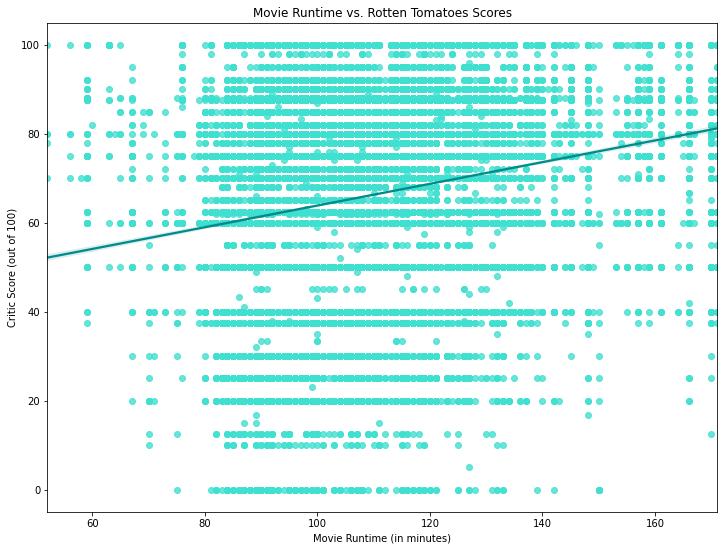

In [90]:
fig, ax = plt.subplots(figsize=(12,9))

ax.set_title('Movie Runtime vs. Rotten Tomatoes Scores')
sns.regplot(x='runtime', y='score', 
            data=info_reviews_df,
            ax=ax,
            color='turquoise',
            line_kws={'color':'darkcyan'},
            fit_reg=True)
ax.set_xlabel('Movie Runtime (in minutes)')
ax.set_ylabel('Critic Score (out of 100)')

plt.savefig("runtimescore.png")

This dataset allows for each film to have multiple scores associated with it, making the plot a little more tricky to navigate, but nonetheless informative. Overall, there seems to be a slight positive correlation between runtime and critic score. 

The higher (60%+) critic scores seem to cluster most tightly between runtimes of 80 & 140 minutes, further solidifying the runtime range previously explored.

## Conclusions

My analysis leads to the following recommendations for Microsoft as they begin their venture into film:

* **Focus primarily on creating Action, Comedy or Horror films before determining where to branch out**. Not only do these genres have some of the most impressive returns on investment, but each genre's profitability has grown, with varying stability, over most of the last decade. Action movies seem to be the safest bet of the three with regards to profit. 
* **Ensure a positive return on investment by making as many high-budget films (at least 40 million USD) as possible**. Only at these large budget levels does there seem to be a positive correlation between the money put into making a film and its relative financial gains. Microsoft is also in the unique position of being able to pay for big budgets from the start. 
* **Gain favorability with audiences & critics by releasing movies that run between 100 & 120 minutes**. Looking at the responses provided by IMDB and Rotten Tomatoes, it seems apparent that the films with tightly clustered positive scores and relatively low amounts of negative reactions have runtimes in this range. Additionally, there does appear to be positive correlation between runtime and response, so do not be afraid to test the upper limits of acceptable runtimes. 

## Next Steps

Given the necessary time, additional analysis could provide insight on questions such as:

* Which experienced studios could Microsoft benefit from a partnership with?
* Which screenwriters make the most profitable scripts?
* Which release months or seasons are best for a film's financial performance?